In [3]:
# Setup

library(tidyverse)
ess_data <- read_csv("https://github.com/CALDISS-AAU/workshop_R-intro/raw/master/data/ESS2018DK_subset.csv")

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  idno = col_double(),
  netustm = col_double(),
  ppltrst = col_double(),
  vote = col_character(),
  prtvtddk = col_character(),
  lvpntyr = col_character(),
  tygrtr = col_character(),
  gndr = col_character(),
  yrbrn = col_double(),
  edlvddk = col_character(),
  eduyrs = col_double(),
  wkhct = col_double(),
  wkhtot = col_double(),
  grspnum = col_double(),
  frlgrsp = col_double(),
  inwtm = col_double()
)


# Visualization with ggplot2

R (more specifically `ggplot2`) is praised for its visualization capabilities. `ggplot2` allows for a high degree of customization and is incredibly versatile in terms of the kinds of visualization possible.

Cheatsheet: https://raw.githubusercontent.com/rstudio/cheatsheets/master/data-visualization-2.1.pdf

Below is shown how to create a scatterplot with `ggplot2`:

In [15]:
head(ess_data)

idno,netustm,ppltrst,vote,prtvtddk,lvpntyr,tygrtr,gndr,yrbrn,edlvddk,eduyrs,wkhct,wkhtot,grspnum,frlgrsp,inwtm
110,180,8,Yes,Socialdemokratiet - The Social democrats,1968,Never too young,Male,1949,"Kort videregående uddannelse af op til 2-3 års varighed, F.eks. Erhvervsakadem",9,28,28,NA,NA,119
705,60,5,Yes,Det Konservative Folkeparti - Conservative People's Party,1976,67,Male,1958,"Kort videregående uddannelse af op til 2-3 års varighed, F.eks. Erhvervsakadem",22,37,45,NA,NA,55
1327,240,5,NA,NA,"Still in parental home, never left 2 months",NA,Male,2000,Folkeskole 9.-10. klasse,11,37,37,NA,NA,37
3760,300,7,Not eligible to vote,NA,"Still in parental home, never left 2 months",40,Male,2002,Folkeskole 9.-10. klasse,9,2,2,200,NA,43
4658,90,8,Yes,NA,1974,50,Female,1956,"Kort videregående uddannelse af op til 2-3 års varighed, F.eks. Erhvervsakadem",4,30,30,NA,NA,62
5816,90,7,Yes,SF Socialistisk Folkeparti - Socialist People's Party,1994,60,Male,1974,"Mellemlang videregående uddannelse af 3-4 års varighed. Professionsbachelorer,",35,37,37,37000,35000,61


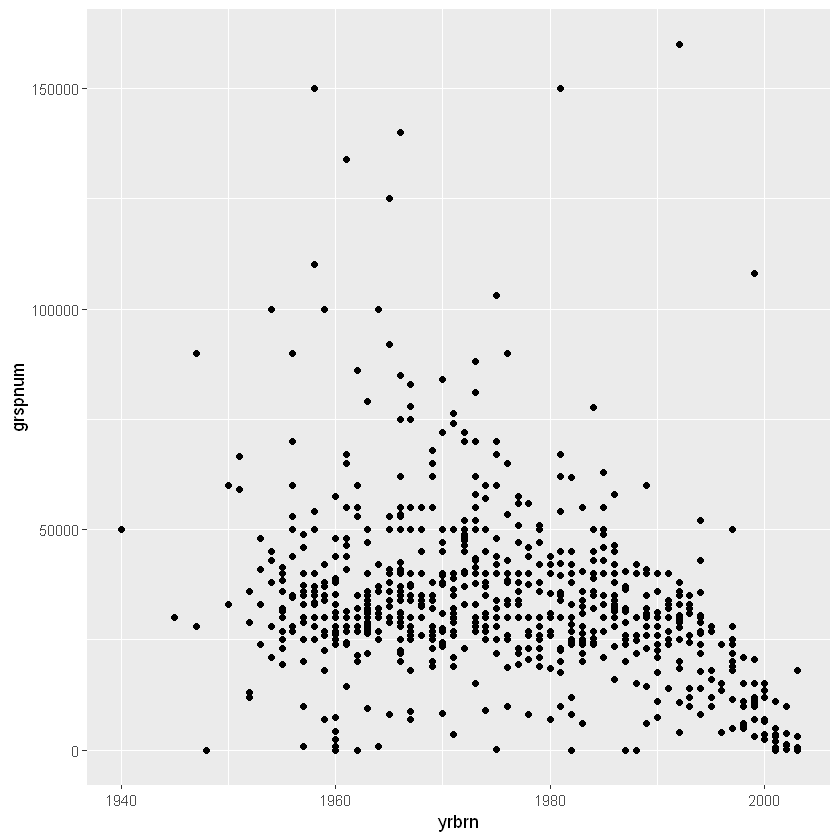

In [9]:
library(ggplot2)

ess_data_filt <- ess_data %>%
    filter(grspnum < 200000)

ggplot(data = ess_data_filt, aes(x = yrbrn, y = grspnum)) + 
    geom_point()

## Structure of a ggplot

As a rule, a ggplot follows this template:

```
ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

- **ggplot**: Main function. This functino denotes what should be included in the plot. The function `ggplot` does not in itself contain information about the type of plot. This is specified via a geom funkcion.
    - *data*: The primary argument for ggplot is the data to be plotted. A data frame is expected


- **mapping**: Argument. Here the information is the data is "mapped" (aes: "aesthetics") to the plot. The primary mappings are `x` and `y`. Other mappings include `colour`, `fill`, `shape`, `size`. Mappings are always specified as `aes(MAPPINGS)` (fx `aes(x = 'eduyrs', y = 'grspnum')`). Mappings can both be specified as an argument for the main ggplot function or for the specific geom functinon. The difference is in whether the mapping applies to the whole plot or a specific geom layer.


- **GEOM_FUNCTION (fx geom_point)**: The plotting function. A "geom" is the geometric shape use to represent the data points (bars, lines, boxplots, points etc.). It is possible to have several geom function (several layers) in the same plot.
    - *mapping*: All geom functions in ggplot accept a mapping argument. However, not all aesthetics are compatible with all geoms. A histogram does fx not contain a mapping for y.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 35 rows containing missing values (geom_point)."

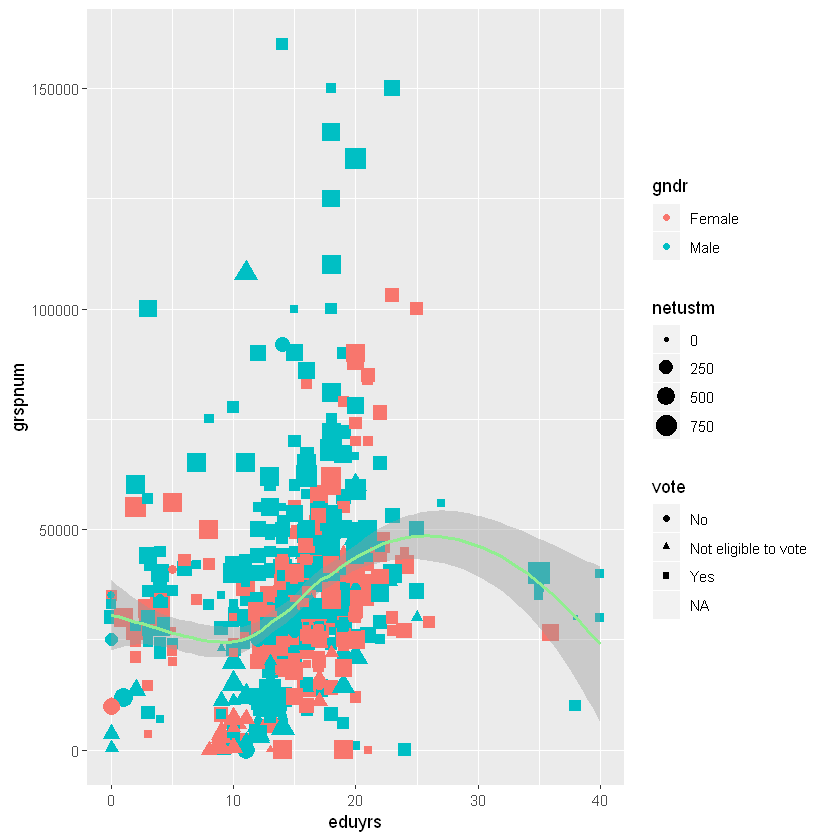

In [16]:
ggplot(data = ess_data_filt, mapping = aes(x = eduyrs, y = grspnum)) +
  geom_point(mapping = aes(colour = gndr, shape = vote, size = netustm)) +
  geom_smooth(colour = 'lightgreen')